<a href="https://colab.research.google.com/github/amicuscertus/Colab001/blob/master/stock003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas_datareader as pdr
#from bokeh.plotting import figure, output_file, show, reset_output
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [0]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

In [0]:
df=pdr.DataReader("8411.JP", "stooq").dropna()
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-03,163.6,164.7,162.3,164.2,108033700
2019-10-02,164.7,166.6,164.2,166.5,72057700
2019-10-01,165.9,167.2,165.9,166.5,78179900
2019-09-30,166.0,166.3,164.8,165.6,99490800
2019-09-27,167.2,167.6,165.3,166.9,113644600


In [0]:
df.index

DatetimeIndex(['2019-10-03', '2019-10-02', '2019-10-01', '2019-09-30',
               '2019-09-27', '2019-09-26', '2019-09-25', '2019-09-24',
               '2019-09-20', '2019-09-19',
               ...
               '2010-01-18', '2010-01-15', '2010-01-14', '2010-01-13',
               '2010-01-12', '2010-01-08', '2010-01-07', '2010-01-06',
               '2010-01-05', '2010-01-04'],
              dtype='datetime64[ns]', name='Date', length=2388, freq=None)

In [0]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-10-03,163.6,164.7,162.3,164.2,108033700
1,2019-10-02,164.7,166.6,164.2,166.5,72057700
2,2019-10-01,165.9,167.2,165.9,166.5,78179900
3,2019-09-30,166.0,166.3,164.8,165.6,99490800
4,2019-09-27,167.2,167.6,165.3,166.9,113644600


In [0]:
df.describe()

,Open,High,Low,Close,Volume
count,2388.000000,2388.000000,2388.000000,2388.000000,2.388000e+03
mean,157.958607,159.346107,156.511383,157.879830,1.676024e+08
std,33.853721,33.977636,33.719398,33.841964,1.147425e+08
min,84.217000,85.068000,83.366000,83.366000,1.814265e+07
25%,133.507500,135.270000,131.860000,133.560000,9.970916e+07
50%,168.420000,169.300000,167.510000,168.345000,1.392854e+08
75%,182.430000,183.750000,181.075000,182.137500,1.967300e+08
max,238.190000,238.540000,230.870000,237.850000,1.504266e+09


In [0]:
dt = df[df['Date'].dt.year == 2019]
dt.head()

,Date,Open,High,Low,Close,Volume
0,2019-10-03,163.6,164.7,162.3,164.2,108033700
1,2019-10-02,164.7,166.6,164.2,166.5,72057700
2,2019-10-01,165.9,167.2,165.9,166.5,78179900
3,2019-09-30,166.0,166.3,164.8,165.6,99490800
4,2019-09-27,167.2,167.6,165.3,166.9,113644600


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([737060., 737091., 737119., 737150., 737180., 737211., 737241.,
        737272., 737303., 737333.]), <a list of 10 Text xticklabel objects>)

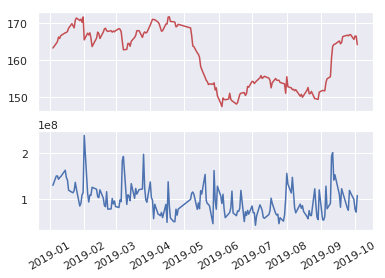

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
ax1.plot(dt['Date'], dt['Close'], color='r')
ax2.plot(dt['Date'], dt['Volume'])
plt.xticks(rotation=30)

In [0]:
dt = df[df['Date'] > '2019-07-01']
dt.head()

,Date,Open,High,Low,Close,Volume
0,2019-10-03,163.6,164.7,162.3,164.2,108033700
1,2019-10-02,164.7,166.6,164.2,166.5,72057700
2,2019-10-01,165.9,167.2,165.9,166.5,78179900
3,2019-09-30,166.0,166.3,164.8,165.6,99490800
4,2019-09-27,167.2,167.6,165.3,166.9,113644600


(array([737239., 737241., 737255., 737269., 737272., 737286., 737300.,
        737303., 737317., 737331., 737333.]),
 <a list of 11 Text xticklabel objects>)

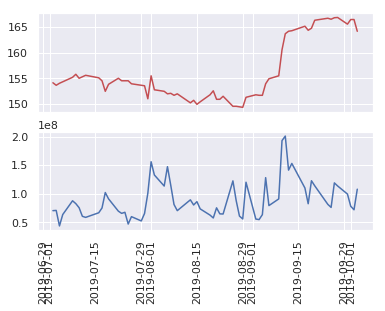

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
ax1.plot(dt['Date'], dt['Close'], color='r')
ax2.plot(dt['Date'], dt['Volume'])
plt.xticks(rotation=90)

In [0]:
import plotly.graph_objects as go

In [0]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'], open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])])
fig.show()

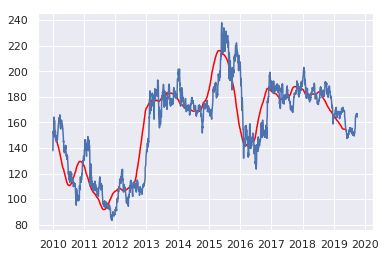

In [0]:
days = 100
plt.plot(df['Date'], df['Close'].rolling(days).mean(), color='red')
plt.plot(df['Date'], df['Close'])

In [0]:
N = 100
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x).astype(int), np.floor(30+2*y).astype(int))]

p = figure()
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
show(p)